<a href="https://colab.research.google.com/github/hiro21lz/rotten-tomatoes/blob/master/rotten_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


# Input datas

There datas are got by scrayping with beautiful soup. The datas are divided
6 files. To reduce data size, the data is limited only 1st pages in each reviewer page. So maximum reviewes per each reviewer is 50. I will show the details seperately.

In [3]:
!ls '/content/drive/My Drive/Colab Notebooks/rottenntomatos'

movie_review_01.csv  movie_review_06.csv    rottenTomato_03.ipynb
movie_review_02.csv  preprocessing2.ipynb   rottenTomato_04.ipynb
movie_review_03.csv  preprocessing.ipynb    rottenTomato_05.ipynb
movie_review_04.csv  rottenTomato_01.ipynb  rottenTomato_06.ipynb
movie_review_05.csv  rottenTomato_02.ipynb  rottenTomato1.ipynb


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DIR = '/content/drive/My Drive/Colab Notebooks/rottenntomatos/'

df1 = pd.read_csv(DIR + 'movie_review_01.csv',sep='\t')
df2 = pd.read_csv(DIR + 'movie_review_02.csv',sep='\t')
df3 = pd.read_csv(DIR + 'movie_review_03.csv',sep='\t')
df4 = pd.read_csv(DIR + 'movie_review_04.csv',sep='\t')
df5 = pd.read_csv(DIR + 'movie_review_05.csv',sep='\t')
df6 = pd.read_csv(DIR + 'movie_review_06.csv',sep='\t')

# connect dataframes
df = pd.concat([df1, df2, df3, df4, df5, df6])
df.head()

,Unnamed: 0,Reviewer,Title,Rate
0,0,Alex Abad-Santos ...,Crazy Rich Asians (2018),1
1,1,Alex Abad-Santos ...,Ant-Man and the Wasp (2018),1
2,2,Alex Abad-Santos ...,Ocean's 8 (2018),1
3,3,Alex Abad-Santos ...,Deadpool 2 (2018),1
4,4,Alex Abad-Santos ...,Avengers: Infinity War (2018),1


# Visualizing data
Let me show how many reviewers review movies.

number of reviewers:419


Text(0,0.5,'number of reviewers')

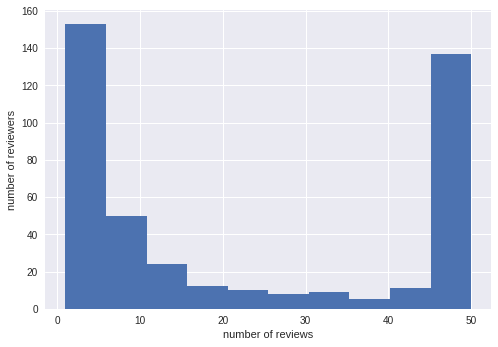

In [115]:
# check unique reviewer
u_reviewer = df['Reviewer'].unique()
print('number of reviewers:{}'.format(len(u_reviewer)))

# show histgram
vc_reviewer = df['Reviewer'].value_counts()
plt.hist(vc_reviewer)
plt.xlabel("number of reviews")
plt.ylabel("number of reviewers")

Majority reviewes number is under 0-5 and second one is 45-50.

For limited scrayping process, 45-50 reviews shows over 50 reviews. Practically,  datas of over 50 views are exist. 

Then let me show how many reviewes are there each movies. 

number of titles:4534


Text(0,0.5,'number of views')

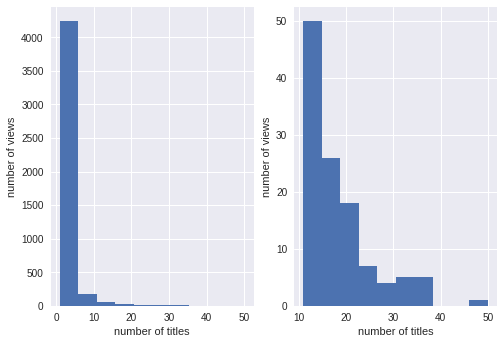

In [114]:
u_title = df['Title'].unique()
print('number of titles:{}'.format(len(u_title)))

vc_title = df['Title'].value_counts()
vc_title_n10_more = vc_title[vc_title>10]

plt.subplot(121)
plt.hist(vc_title)
plt.xlabel("number of titles")
plt.ylabel("number of views")

plt.subplot(122)
plt.hist(vc_title_n10_more)
plt.xlabel("number of titles")
plt.ylabel("number of views")


The left one is the all data and the right one is limited over 10 reviews. 

Almost movies have only under 5 reviewes. This means that people don't know many movies and attracting attention is difficult in movie industory. 

Now I focus on over 10 reviews movie to improve data quality. The number becomes 116 titles.



In [116]:
df2 = df[df['Title'].isin(vc_title_n10_more.index)]
u_title = df2['Title'].unique()
print('number of titles:{}'.format(len(u_title)))

number of titles:116


Let see content of 116 reviewes.

(0, 1)

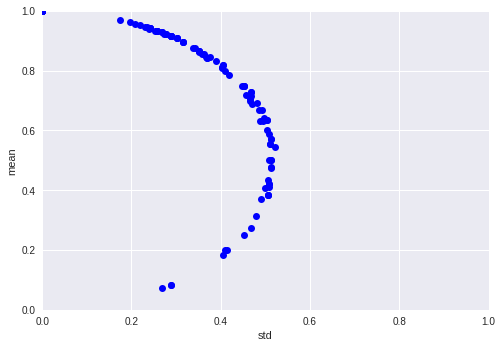

In [118]:
df2_groupby = df2.groupby('Title',as_index=False)
mean = df2_groupby.mean()['Rate']
std = np.sqrt(df2_groupby.var()['Rate'])

plt.plot(std,mean,'bo')
plt.xlabel('std')
plt.ylabel('mean')
plt.xlim([0,1]) 
plt.ylim([0,1]) 

There is inevitability to make this plot look like a half circle. 

Reviewers evaluate score 1(good) or 0(bad) in rotten-tomatoes. Large std means there are both scoring people who give 1 and 0. 
It can be said there are opinions on the pros and cons of this movie.

Movies in Low std and high mean get high evaluation by alomost people. However, 
There may be core entries for movie enthusiasts.

So let see how many reviews in same score:1. 

(0, 1)

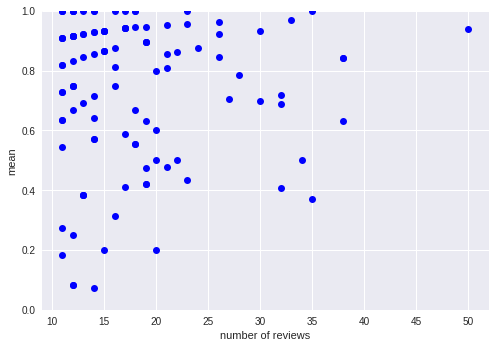

In [117]:
n_review = df2.groupby('Title').nunique()['Reviewer']

plt.plot(n_review,mean,'bo')
plt.xlabel('number of reviews')
plt.ylabel('mean')
plt.ylim([0,1]) 


In this data, there are wide range of number of reviews from 10 to 50. 

Genellary many reviews tend to be high score. 

This result is resonable because better movies attract many people.

In [103]:
title = df2_groupby.mean().sort_values('Rate', ascending=False)
title

,Title,Unnamed: 0,Rate
32,Film Stars Don't Die in Liverpool (2017),810.000000,1.000000
107,Upgrade (2018),830.666667,1.000000
81,The Death of Stalin (2018),559.000000,1.000000
53,Loveless (Nelyubov) (2018),929.333333,1.000000
51,Leave No Trace (2018),819.388889,1.000000
46,"Juliet, Naked (2018)",903.250000,1.000000
41,"I, Tonya (2018)",732.086957,1.000000
96,The Rider (2018),778.857143,1.000000
99,The Square (2017),550.636364,1.000000
29,Eighth Grade (2018),853.611111,1.000000


In next file, I will analyse cluster analysis include me and recommend personal good movies.